In [1]:
import time
import glob
import torch
import os
import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.0 _CudaDeviceProperties(name='Quadro K620', major=5, minor=0, total_memory=2048MB, multi_processor_count=3)


In [2]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(10, 12)
    plt.axis("off")
    #plt.rcParams['figure.figsize'] = [10, 5]
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()
    
outfd = r"./output/"

def showall(path):
    for filename in os.listdir(path):
        if filename[-4:] == ".tif":
            img = os.path.join(path,filename)
            print(img)
            imShow(img)
        elif filename[-4:] == ".jpeg" or filename[-4:] == ".jpg":
            img = os.path.join(path,filename)
            print(img)
            imShow(img)

In [ ]:
# # t1f_22, img, t1f_30cm_127, T1F_ORTHO_withGCPs_30cm
# source = "C:\\Development\\dev_tools\\tree-detector-yolo\\data\\t1f_5.tif"
# cfg = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
# weights = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\weights\\last_1cls_1300.pt"
# names = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\acacia.names"
# conf_thres = 0.2
# iou_thres = 0.1

# !python detect.py \
# --geo \
# --save-geom \
# --save-label \
# --source="{source}" \
# --cfg="{cfg}" \
# --weights="{weights}" \
# --names="{names}" \
# --conf-thres="{conf_thres}" \
# --iou-thres="{iou_thres}" \
# --agnostic-nms \
# --augment

# showall(outfd)

In [ ]:
# source ="C:\\Development\\dev_tools\\tree-detector-yolo\\data\\keresa0000_0002.tif"
# cfg ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg"
# weights ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_500.pt"
# names ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
# # outDir="C:\\Map\\Deep_learning\\digital_globe\\011802594010_01\\pansharp_rgb_tiles\\765\\yolo"
# conf_thres = 0.2
# iou_thres = 0.1

# !python detect.py \
# --geo \
# --save-geom \
# --save-label \
# --source="{source}" \
# --cfg="{cfg}" \
# --weights="{weights}" \
# --names="{names}" \
# --conf-thres="{conf_thres}" \
# --iou-thres="{iou_thres}" \
# --augment

# showall(outfd)

In [35]:
import platform
tiny=True
if platform.node() == 'GPPGIS06':
    # # t1f_22, img, t1f_30cm_127, T1F_ORTHO_withGCPs_30cm
    source = "C:\\Development\\dev_tools\\tree-detector-yolo\\data\\t1f_5.tif"
    cfg = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
    weights = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\weights\\last_1cls_1300.pt"
    names = "C:\\Users\\lerryw\\Google Drive\\acacia_dataset\\acacia.names"
    
    source_op = "C:\\Development\\dev_tools\\tree-detector-yolo\\data\\608.tif"
    if tiny:
        cfg_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3-tiny3-1cls.cfg"
        weights_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_op_tiny_200.pt"
        names_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
    else:
        cfg_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg"
        weights_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\last_oilpalm_wv_500.pt"
        names_op ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
    
elif platform.node() == 'LWS-PC':
    cfg = "E:\\GDrive\\acacia_dataset\\cfg\\yolov3-spp-1cls.cfg"
    weights = "E:\\GDrive\\acacia_dataset\\weights\\last_1cls_1300.pt"
    names = "E:\\GDrive\\acacia_dataset\\acacia.names"

In [ ]:
!python detectv2.py --source="{source}" \
--output=./output \
--cfg="{cfg}" \
--weights="{weights}" \
--names="{names}" \
--conf-thres 0.1 \
--iou-thres 0.2

In [41]:
!python detectv2.py --source="{source_op}" \
--output=./output \
--cfg="{cfg_op}" \
--weights="{weights_op}" \
--names="{names_op}" \
--conf-thres 0.1 \
--iou-thres 0.3 \
--ratio

Namespace(agnostic_nms=False, augment=False, cfg='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3-tiny3-1cls.cfg', classes=None, conf_thres=0.1, device='', half=False, img_size=416, iou_thres=0.3, names='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names', output='./output', ratio=True, save_img=False, save_txt=False, source='C:\\Development\\dev_tools\\tree-detector-yolo\\data\\608.tif', view_img=False, weights='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_op_tiny_200.pt')
Using CUDA device0 _CudaDeviceProperties(name='Quadro K620', total_memory=2048MB)

Model Summary: 45 layers, 9.00039e+06 parameters, 9.00039e+06 gradients
Total object before NMS :  1883
Total object detected :  1028
Done. (9.845s)


In [ ]:
# import torch
# a = torch.tensor(())
# for i in range(3):
#     # if i = torch.tensor(1)
#     # it cannot be cat, since it has 
#     # zero dimention.
#     # Also use .float() to make sure that they 
#     # are in the same dtype
#     i = torch.tensor([i]).float()
#     a = torch.cat((a, i), 0)
# print(a)

Namespace(agnostic_nms=False, augment=True, cfg='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', geo=True, half=False, img_size=512, iou_thres=0.3, names='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names', output='./output', save_geom=True, save_label=True, save_txt=False, source='C:\\Development\\dev_tools\\tree-detector-yolo\\data\\608.tif', view_img=False, weights='C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_300.pt')
Using CUDA device0 _CudaDeviceProperties(name='Quadro K620', total_memory=2048MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1 C:\Development\dev_tools\tree-detector-yolo\data\608.tif: 576x576 896 OP1s, Done. (0.840s)
Results saved to C:\Development\yolov3\./output
Done. (3.340s)
./output/608.tif


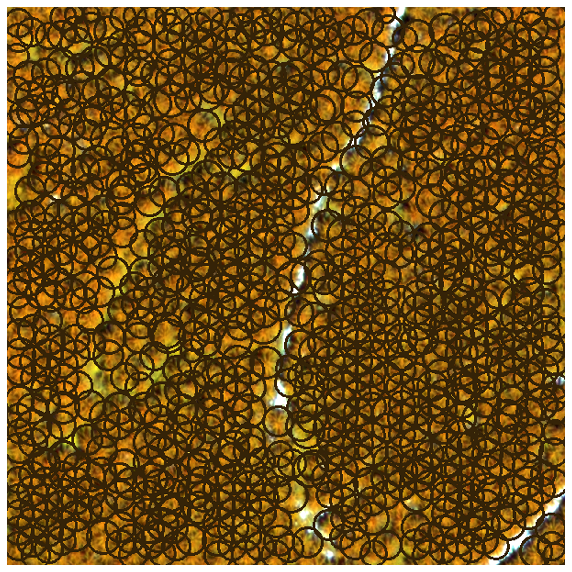

In [32]:
source =r"C:\Development\dev_tools\tree-detector-yolo\data\608.tif"
cfg ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3_spp_1cls_op.cfg"
weights ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_oilpalm_wv_300.pt"
names ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
conf_thres = 0.1
iou_thres = 0.3

!python detect.py \
--geo \
--save-geom \
--source="{source}" \
--save-label \
--cfg="{cfg}" \
--weights="{weights}" \
--names="{names}" \
--conf-thres="{conf_thres}" \
--iou-thres="{iou_thres}" \
--augment

showall(outfd)

In [ ]:
source =r"C:\Map\Deep_learning\digital_globe\011802594020_01\pansharp_rgb_tiles\765\tiles"
cfg ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\cfg\\yolov3-tiny3-1cls.cfg"
weights ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\weights\\best_op_tiny_200.pt"
names ="C:\\Users\\lerryw\\Google Drive\\satellite_dataset\\worldview\\op.names"
outDir=r"C:\Map\Deep_learning\digital_globe\011802594020_01\pansharp_rgb_tiles\765\yolo"
conf_thres = 0.1
iou_thres = 0.2

!python detect.py \
--source="{source}" \
--save-label \
--cfg="{cfg}" \
--weights="{weights}" \
--names="{names}" \
--conf-thres="{conf_thres}" \
--iou-thres="{iou_thres}" \
--output="{outDir}" \
--augment

In [ ]:
from utils.utils import to_tiles
path_wv=r"C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\keresa.tif"
outFd = r"C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\using_slice"
to_tiles(path_wv,outFd,416,416)

In [ ]:
# Slice image
from utils.slice import slice_im
input_img=r'C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\keresa.tif'
out_name='img_sliced'
out_dir=r'C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\using_slice'
slice_im(input_img,out_name,out_dir,sliceHeight=416, sliceWidth=416,
         zero_frac_thresh=0.2, overlap=0, slice_sep='_',
         out_ext='.png', verbose=False)

In [ ]:
import cv2
import numpy as np
img=cv2.imread(input_img, cv2.IMREAD_LOAD_GDAL)

In [ ]:
with rio.open(input_img) as src:
    if src.transform is None or src.crs is None:
        raise SystemExit(print("[ ERROR! ] Input image file " + inputfile + \
                               " is not a geographic raster. System exit!"))
    # frame = src.read()
    image_crs = src.crs
    affine = src.transform
    src_meta = src.profile

In [ ]:
tile_window = rasterio.windows.Window(0, 0, 416, 416)
tile_affine = rasterio.windows.transform(tile_window, smaller_image_affine)
tile_image = smaller_image[(slice(None),) + tile_window.toslices()]

In [ ]:
out_img = np.transpose(img, (2, 0, 1))

In [ ]:
import rasterio as rio
outdir=r'C:\Map\Deep_learning\digital_globe\011802594010_01\pansharp_rgb_tiles\765\test_out.tif'
with rio.open(outdir, 'w', **src_meta) as dst:
    dst.write(out_img, [3, 2, 1])

In [3]:
from models import convert

convert(cfg=r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\cfg\yolov3-tiny3-1cls.cfg',
        weights=r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\weights\best_op_tiny_200.pt')

Model Summary: 45 layers, 9.00039e+06 parameters, 9.00039e+06 gradients
Success: converted 'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\weights\best_op_tiny_200.pt' to 'converted.weights'


In [ ]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm
def plots(start=0, stop=0, bucket='', id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 4, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    # s = ['GIoU', 'Objectness', 'Classification', 'Precision', 'Recall',
    #      'val GIoU', 'val Objectness', 'val Classification', 'mAP@0.5', 'F1']
    s = ['GIoU', 'Objectness', 'Precision', 'Recall',
         'val GIoU', 'val Objectness', 'mAP@0.5', 'F1']
    if bucket:
        os.system('rm -rf storage.googleapis.com')
        files = ['https://storage.googleapis.com/%s/results%g.txt' % (bucket, x) for x in id]
    else:
        files = glob.glob(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\*_wv_*.txt') #+ glob.glob('../../Downloads/results*.txt')

    for f in sorted(files,reverse=True):
        try:
            # results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            results = np.loadtxt(f, usecols=[2, 3, 8, 9, 12, 13, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(8):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
    fig.savefig(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results.png', dpi=360)

plots()

In [ ]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm
def plots(start=0, stop=0, bucket='', id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 2, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    s = ['Precision', 'Recall', 'mAP@0.5', 'F1']
    files = glob.glob(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results_oilpalm_wv_500.txt') #+ glob.glob('../../Downloads/results*.txt')
    for f in sorted(files):
        try:
            results = np.loadtxt(f, usecols=[8, 9, 10, 11], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(4):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
    fig.savefig(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results_oilpalm_wv_500.png', dpi=360)

plots()

In [ ]:
import glob
import math
import os
import random
import shutil
import subprocess
import time
from copy import copy
from pathlib import Path
from sys import platform

import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision
from tqdm import tqdm
def plots(start=0, stop=0, bucket='', id=()):  # from utils.utils import *; plot_results()
    # Plot training 'results*.txt' as seen in https://github.com/ultralytics/yolov3#training
    fig, ax = plt.subplots(2, 1, figsize=(12, 6), tight_layout=True)
    ax = ax.ravel()
    # s = ['GIoU', 'Objectness', 'Classification', 'Precision', 'Recall',
    #      'val GIoU', 'val Objectness', 'val Classification', 'mAP@0.5', 'F1']
    s = ['GIoU', 'val GIoU']
    if bucket:
        os.system('rm -rf storage.googleapis.com')
        files = ['https://storage.googleapis.com/%s/results%g.txt' % (bucket, x) for x in id]
    else:
        files = glob.glob(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results_oilpalm_wv_500.txt') #+ glob.glob('../../Downloads/results*.txt')
    for f in sorted(files):
        try:
            # results = np.loadtxt(f, usecols=[2, 3, 4, 8, 9, 12, 13, 14, 10, 11], ndmin=2).T
            results = np.loadtxt(f, usecols=[2, 12], ndmin=2).T
            n = results.shape[1]  # number of rows
            x = range(start, min(stop, n) if stop else n)
            for i in range(2):
                y = results[i, x]
                if i in [0, 1, 2, 5, 6, 7]:
                    y[y == 0] = np.nan  # dont show zero loss values
                    # y /= y[0]  # normalize
                ax[i].plot(x, y, marker='', label=Path(f).stem, linewidth=2, markersize=8)
                ax[i].set_title(s[i])
                # if i in [5, 6, 7]:  # share train and val loss y axes
                #     ax[i].get_shared_y_axes().join(ax[i], ax[i - 5])
        except:
            print('Warning: Plotting error for %s, skipping file' % f)

    ax[1].legend()
#     fig.savefig(r'C:\Users\lerryw\Google Drive\satellite_dataset\worldview\results\results.png', dpi=360)

plots()